In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [3]:
targetdir = "./data/ShareOfTransactions/"
filename = "share_of_transactions.csv"

df = pd.read_csv(targetdir + filename)

In [4]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["date"])

In [5]:
df

,date,category,shareOfTransactions
0,2017-11-23,Art,1.000000
1,2017-11-24,Art,1.000000
2,2017-11-25,Art,1.000000
3,2017-11-26,Art,1.000000
4,2017-11-27,Art,1.000000
...,...,...,...
6290,2021-04-27,Games,0.688506
6292,2021-04-27,Other,0.057519
6288,2021-04-27,Art,0.015478
6289,2021-04-27,Collectible,0.224697


In [6]:
pivoted_df = df.pivot(index='date', columns='category', values='shareOfTransactions').fillna(0).reset_index()\
             .rolling(window="30D", on="date").mean()
pivoted_df

category,date,Art,Collectible,Games,Metaverse,Other,Utility
0,2017-11-23,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-11-24,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2017-11-25,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2017-11-26,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-11-27,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
1247,2021-04-23,0.093928,0.340935,0.492484,0.005402,0.066440,0.000811
1248,2021-04-24,0.091018,0.333643,0.503126,0.005490,0.065933,0.000789
1249,2021-04-25,0.087996,0.323494,0.516964,0.005823,0.064956,0.000767
1250,2021-04-26,0.085584,0.309830,0.533514,0.006109,0.064206,0.000758


/var/folders/5j/4tfq0lqx0bvc0ywx8_h44jjm0000gn/T/ipykernel_2676/2547234172.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


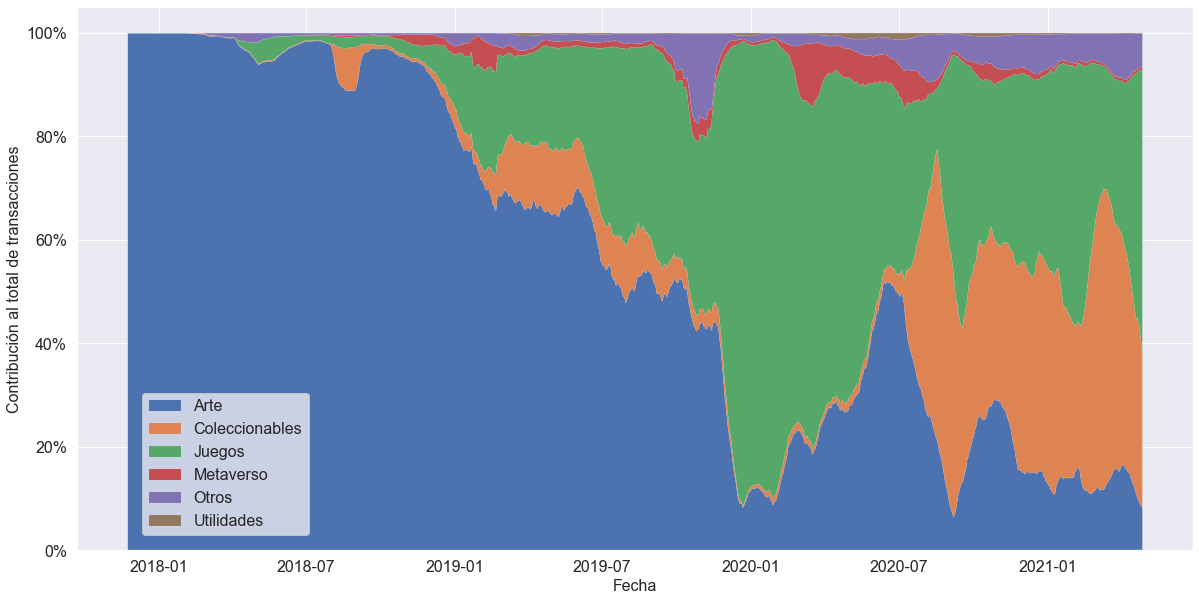

In [9]:
fig = plt.figure()

labels = ["Arte", "Coleccionables", "Juegos", "Metaverso", "Otros", "Utilidades"]
#color_map = ["#4F808D", "#EC7832", "#DDB67E", "#234172", "#B69382", "#7B869E"]

ax = plt.stackplot(pivoted_df['date'], 
                   pivoted_df["Art"], 
                   pivoted_df["Collectible"],
                   pivoted_df["Games"], 
                   pivoted_df["Metaverse"], 
                   pivoted_df["Other"],
                   pivoted_df["Utility"], labels=labels, lw=0.05)

plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Contribución al total de transacciones", fontsize=16)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.legend(labels, bbox_to_anchor=(0.215,0.305), prop={'size': 16})
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

plt.savefig("./shareOfTransactions/shareOfTransactions.svg", bbox_inches='tight')

# No window

In [9]:
art_df = df[df["category"] == "Art"]
art_df

,date,category,shareOfTransactions
0,2017-11-23,Art,1.000000
1,2017-11-24,Art,1.000000
2,2017-11-25,Art,1.000000
3,2017-11-26,Art,1.000000
4,2017-11-27,Art,1.000000
...,...,...,...
6264,2021-04-23,Art,0.020646
6270,2021-04-24,Art,0.022497
6276,2021-04-25,Art,0.021856
6282,2021-04-26,Art,0.020499


In [10]:
collectible_df = df[df["category"] == "Collectible"]
collectible_df

,date,category,shareOfTransactions
74,2018-02-04,Collectible,0.001136
76,2018-02-05,Collectible,0.006596
78,2018-02-06,Collectible,0.002387
80,2018-02-07,Collectible,0.002006
82,2018-02-08,Collectible,0.012302
...,...,...,...
6265,2021-04-23,Collectible,0.308376
6271,2021-04-24,Collectible,0.303171
6277,2021-04-25,Collectible,0.217624
6283,2021-04-26,Collectible,0.228516


In [11]:
games_df = df[df["category"] == "Games"]
games_df

,date,category,shareOfTransactions
151,2018-03-10,Games,0.000499
162,2018-03-15,Games,0.000617
199,2018-03-29,Games,0.000918
216,2018-04-05,Games,0.011202
219,2018-04-06,Games,0.045680
...,...,...,...
6266,2021-04-23,Games,0.605823
6272,2021-04-24,Games,0.613329
6278,2021-04-25,Games,0.698348
6284,2021-04-26,Games,0.695357


In [12]:
metaverse_df = df[df["category"] == "Metaverse"]
metaverse_df

,date,category,shareOfTransactions
460,2018-06-12,Metaverse,0.002058
480,2018-06-18,Metaverse,0.000700
485,2018-06-19,Metaverse,0.004994
489,2018-06-20,Metaverse,0.004415
494,2018-06-21,Metaverse,0.001168
...,...,...,...
6267,2021-04-23,Metaverse,0.009136
6273,2021-04-24,Metaverse,0.009404
6279,2021-04-25,Metaverse,0.016750
6285,2021-04-26,Metaverse,0.015657


In [13]:
other_df = df[df["category"] == "Other"]
other_df

,date,category,shareOfTransactions
98,2018-02-16,Other,0.003504
100,2018-02-17,Other,0.001571
103,2018-02-18,Other,0.002735
105,2018-02-19,Other,0.000861
110,2018-02-21,Other,0.003083
...,...,...,...
6268,2021-04-23,Other,0.055622
6274,2021-04-24,Other,0.051398
6280,2021-04-25,Other,0.045252
6286,2021-04-26,Other,0.039807


In [14]:
utility_df = df[df["category"] == "Utility"]
utility_df

,date,category,shareOfTransactions
1573,2019-02-11,Utility,0.000609
1619,2019-02-20,Utility,0.001595
1630,2019-02-22,Utility,0.002221
1636,2019-02-23,Utility,0.000560
1642,2019-02-24,Utility,0.000799
...,...,...,...
6269,2021-04-23,Utility,0.000397
6275,2021-04-24,Utility,0.000201
6281,2021-04-25,Utility,0.000170
6287,2021-04-26,Utility,0.000164


In [15]:
all_df = art_df.set_index('date')\
    .join(other=collectible_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_art', rsuffix='_collectible') \
    .join(other=games_df.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=metaverse_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_games', rsuffix='_metaverse') \
    .join(other=other_df.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=utility_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_other', rsuffix='_utility').reset_index()

all_df.fillna(0, inplace=True)

all_df

,date,category_art,shareOfTransactions_art,category_collectible,shareOfTransactions_collectible,category_games,shareOfTransactions_games,category_metaverse,shareOfTransactions_metaverse,category_other,shareOfTransactions_other,category_utility,shareOfTransactions_utility
0,2017-11-23,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
1,2017-11-24,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
2,2017-11-25,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
3,2017-11-26,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
4,2017-11-27,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2021-04-23,Art,0.020646,Collectible,0.308376,Games,0.605823,Metaverse,0.009136,Other,0.055622,Utility,0.000397
1248,2021-04-24,Art,0.022497,Collectible,0.303171,Games,0.613329,Metaverse,0.009404,Other,0.051398,Utility,0.000201
1249,2021-04-25,Art,0.021856,Collectible,0.217624,Games,0.698348,Metaverse,0.016750,Other,0.045252,Utility,0.000170
1250,2021-04-26,Art,0.020499,Collectible,0.228516,Games,0.695357,Metaverse,0.015657,Other,0.039807,Utility,0.000164


/var/folders/5j/4tfq0lqx0bvc0ywx8_h44jjm0000gn/T/ipykernel_1695/1288654218.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


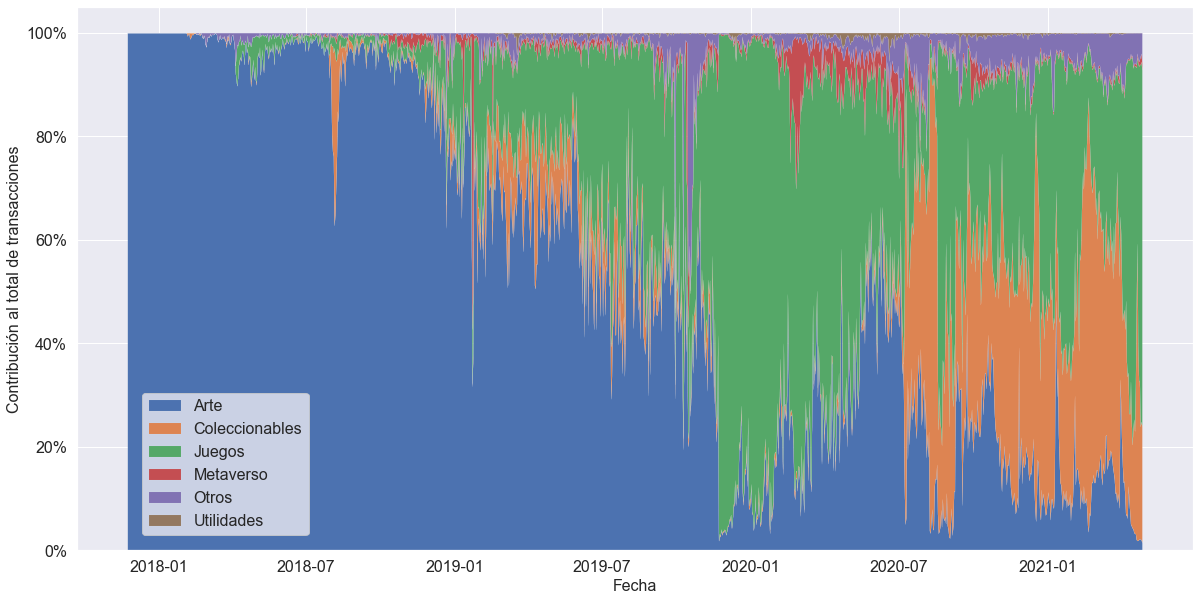

In [42]:
fig = plt.figure()

labels = ["Arte", "Coleccionables", "Juegos", "Metaverso", "Otros", "Utilidades"]

ax = plt.stackplot(all_df['date'], all_df["shareOfTransactions_art"], all_df["shareOfTransactions_collectible"],
                   all_df["shareOfTransactions_games"], all_df["shareOfTransactions_metaverse"], 
                   all_df["shareOfTransactions_other"], all_df["shareOfTransactions_utility"], 
                   labels=labels, lw=0.05)

plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Contribución al total de transacciones", fontsize=16)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.legend(labels, bbox_to_anchor=(0.215,0.305), prop={'size': 16})

plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

plt.savefig("./shareOfTransactions/shareOfTransactions_no_window.svg", bbox_inches='tight')

plt.show()